# Project 2: Reproducibility in Natural Language Processing



### Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [2]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


## Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

In this part, we use `SpaCy` to do simple text processing of the speeches. This package is included in the `environment.yml`, but please download `en_core_web_sm`, an English language text processing model. Run the following code after activating the `sotu` environment.

```
python -m spacy download en_core_web_sm
```

- *Token*: a single word or piece of a word
- *Lemma*: the core component of a word, e.g., "complete" is the lemma for "completed" and "completely"
- *Stop Word*: a common word that does not add semantic value, such as "a", "and", "the", etc.
- *Vectorization*: representing a document as a vector where each index in the vector corresponds to a token or word and each entry is the count.

1. Process speeches using the SpaCy nlp module
2. Analyze Tokens vs Lemmas:
- Create a list of all tokens across all speeches that are not stop words, punctuation, or spaces.
- Create a second list of the lemmas for these same tokens.
- Display the top 25 for each of these and compare.
3. Analyze common word distributions over different years:
- Create a function that takes the dataset and a year as an input and outputs the top n lemmas for that year's speeches
- Compare the top 10 words for 2023 versus 2019
4. Document Vectorization:
- Train a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization model using your processed dataset and scikit learn
- Output the feature vectors 


### 1. Processing Speeches with the SpaCy nlp module

In [10]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

In [11]:
# subset the speech dataframe for speeches from 2000 and onwards
sou_recent_years = sou[sou['Year'] >= 2000]

In [32]:
# Process each speeches using the 'nlp' function
# should take about 30 seconds to process

nlp_speeches = []

for idx, row in sou_recent_years.iterrows():
    parsed_txt = nlp(row.Text)

    nlp_speeches.append(parsed_txt)

### 2. Analyze Tokens vs Lemmas

#### Token List
*Tokens* are a single word or piece of a word. In the next cell, we create a list of tokens across all speeches, excluding spaces, stopwords, or punctuation. All tokens are made lowercase.

In [3]:
token_list = []

for doc in nlp_speeches:
    for token in doc:
        if not token.is_space and not token.is_stop and not token.is_punct:
            token_list.append(token.text.lower())

NameError: name 'nlp_speeches' is not defined

In [34]:
# print top 20 tokens

token_count = Counter(token_list).most_common(20)
token_count

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

*Lemmas* are the core component of a word, e.g., "complete" is the lemma for "completed" and "completely". In the next cell, we extract the lemmas across all the speeches, excluding spaces, stopwords, and punctuation.

In [35]:
lemma_list = []

for doc in nlp_speeches:
    for token in doc:
        if not token.is_space and not token.is_stop and not token.is_punct:
            lemma_list.append(token.lemma_.lower())

In [36]:
# print top 20 lemmas

lemma_count = Counter(lemma_list).most_common(20)
lemma_count

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

What do you notice about the top tokens versus the top lemmas? 
Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"?
What about the lemma "child"?

### Common Words

#### Common Words per Year Function

Fill in the below function to obtain the n-most common words in speeches for a given year.

inputs: 
- df raw unprocessed sou dataframe
- year
- n
outputs: 
- top n words for that years

steps:
- subset the dataframe for the year of interest - note the years might not be in int type
- process the subsetted dataframe with spacy
- get the lemmas across all those speeches
- count the top n lemmas

In [37]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df
    df_subset = df[df['Year'] == year]

    # Step 2: Process the text with spaCy
    for idx, row in df_subset.iterrows():
        parsed_txt = nlp(row.Text)

    # Step 3: Get lemmas
        lemma_list = []
        for token in parsed_txt:
            if not token.is_space and not token.is_stop and not token.is_punct:
                lemma_list.append(token.lemma_.lower())

    # Step 4: Count top n lemmas
    lemma_counts = Counter(lemma_list).most_common(n)

    return lemma_counts

In [38]:
# test it on 2024
get_most_common_words(df=sou, year=2024, n=10)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

#### Compare 2023 to 2017

Run your function from the previous step to get the top 20 words for 2017 and 2023. Plot the words and their frequencies in a barchart and replicate the figure below.

In [39]:
words_2023 = get_most_common_words(df=sou, year=2023, n=20)
words_2017 = get_most_common_words(df=sou, year=2017, n=20)

In [40]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [41]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [42]:
# Hint - put the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])

Text(0.5, 1.0, '2023 State of the Union Most Frequent Words')

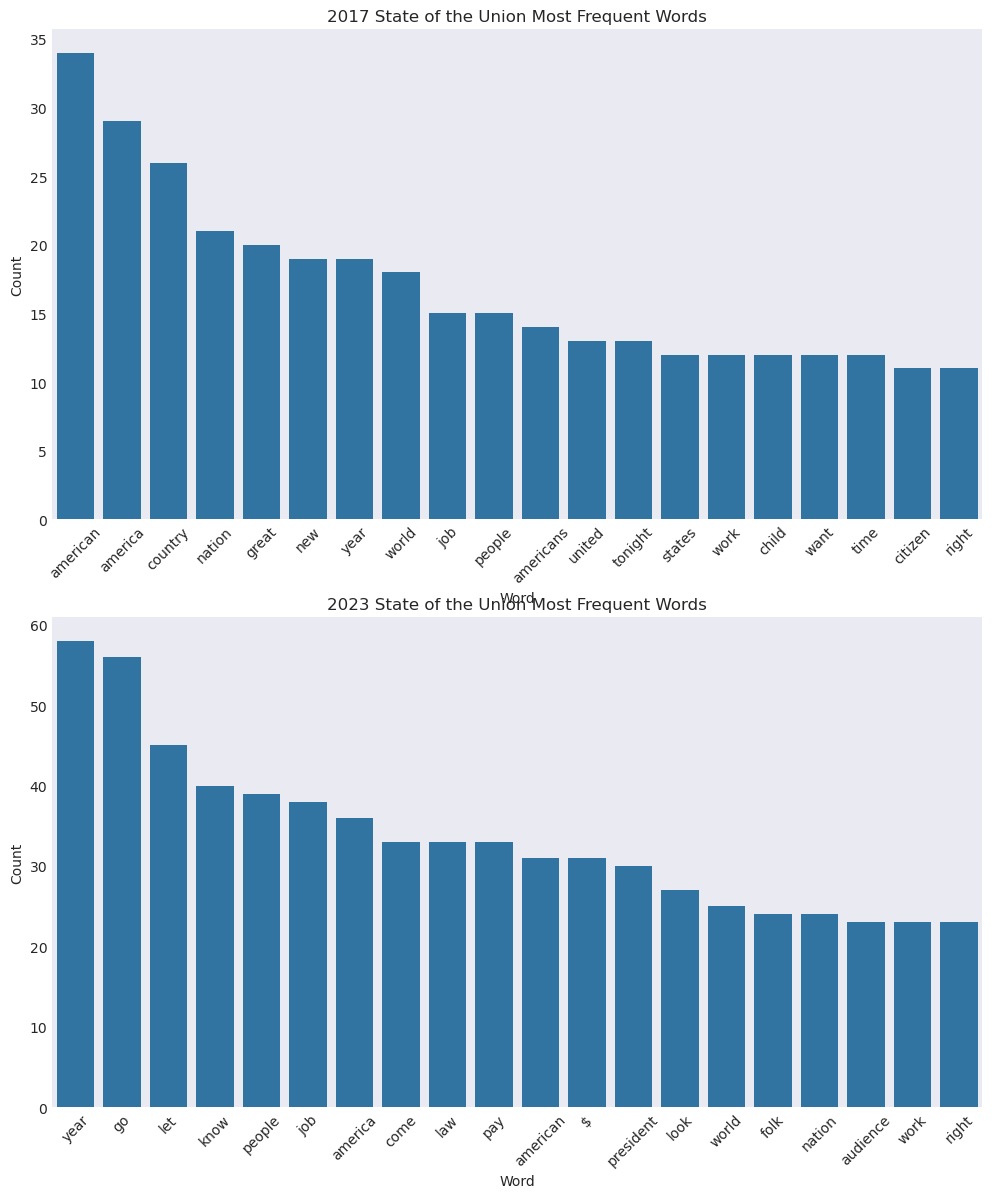

In [43]:
# Hint - use seaborn, subplots, and rotate tick labels
import seaborn as sns

fig, axs = plt.subplots(nrows=2, figsize=(12,14))

sns.barplot(df_2017, x='Word', y='Count', ax=axs[0]).tick_params(axis='x', rotation=45)
sns.barplot(df_2023, x='Word', y='Count', ax=axs[1]).tick_params(axis='x', rotation=45)

axs[0].set_title('2017 State of the Union Most Frequent Words')
axs[1].set_title('2023 State of the Union Most Frequent Words')

### TF-IDF Vectorization

To use statsitical alorithms on documents, we need to transform them into vectors, where each element of the vector corresponds to a particular word in a document or corpus of documents. One common way is via TF-IDF embeddings. LLMs work similarly - they typically use transformer models to generate text embeddings before sending text through a deep neural network. 

Here we will fit a TF-IDF vectorizer, plot all the speeches on a 2-D grid using PCA and also using a heatmap, and examine TF-IDF scores for the top 10 most common words in the first speech. This is a good resource here: https://medium.com/GeoffreyGordonAshbrook/vector-visualization-2d-plot-your-tf-idf-with-pca-83fa9fccb1d 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#from nltk.tokenize.casual import casual_tokenize

#### Train the Vectorizer and Transform the Data

In [45]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [46]:
# Hint - use fit_transform for vectorizer and PCA

tfidf_model = TfidfVectorizer() # select model; leave tokenizer blank to use default tokenization model; alternatively, use casual_tokenize from nltk

tfidf_vectors = tfidf_model.fit_transform(raw_documents=raw_docs).toarray() # fit model

The output of `fit_transform()` will be a matrix where each row corresponds to a speech, each column corresponds to a word in the corpus of speeches, and the value is the TF-IDF score which measures the importance of that word in that speech, relative to the rest of the speeches.

#### Plot Speeches

- First used PCA to generate the first chart
- Second use seaborn heatmap with a log-scaled color axis to generate the second chart

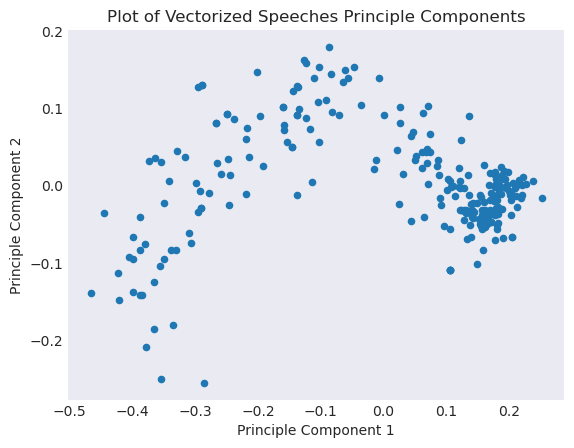

In [47]:
# Step 1: Set PCA to find first 2 principal components
pca = PCA(n_components=2)

# Step 2: Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
name_of_vector_array = tfidf_vectors
df2d = pd.DataFrame(pca.fit_transform(name_of_vector_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)
df2d.plot(kind='scatter', x='x', y='y')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Plot of Vectorized Speeches Principle Components")
plt.show()

In [48]:
# Hint - vectorized_docs is a sparse matrix whose rows are speeches and columns are tokens, with each
# value being a TF-IDF score. Densify this array first, and then plot using seaborn.

#### Get the TF-IDF value for certain words and documents

In [49]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [50]:
word_nums = [tfidf_model.vocabulary_[word] for word in word_list] # get each word's index number using the .vocabular_ attributed of vectorizer

In [51]:
idf_score = [tfidf_model.idf_[i] for i in word_nums] # get their IDF score by using .idf_ at the indices from the previous step

In [52]:
tf_idf = [tfidf_vectors[0][i] for i in word_nums] # get the tf_idf score for the first speech

In [53]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438


## Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

**Resources:**
- LDA:
    - https://medium.com/sayahfares19/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06 
    - https://www.kaggle.com/code/faressayah/text-analysis-topic-modeling-with-spacy-gensim#%F0%9F%93%9A-Topic-Modeling (code for previous post)
    - https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf/ 
- BERTopic:
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_documents.html#visualize-documents-with-plotly 
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_topics.html 


In [72]:
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

### LDA

- Train an LDA model with 18 topics
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization

You may use the next two cells to process the data.

In [73]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [74]:
# Process all texts - note this takes ~ 5 minutes to run
processed_docs = sou['Text'].apply(preprocess_text)

To train an LDA model, use the LdaModel function that we imported a couple of cells back. The last resource linked under the LDA section is especially useful for walking through the steps we have below. *Note: one of the arguments to the LdaModel function is `random_state` which specifies the random seed for reproducibility. Please set yours to 42. Further, the last resource provided uses `LdaMulticore` which is essentially a parallelizable version of our function `LdaModel`. Use `LdaModel` instead, but the usage will be similar, except you can ignore the `iterations` and `workers` arguments..*.

In [77]:
# Build dictionary from processed_docs, which is a list of tokens extracted from our speeches

In [78]:
# train LDA model with 18 topics

In [79]:
# print the top 10 words for each topic


--- LDA Topics ---
Topic: 0 
Words: 0.004*"cent" + 0.004*"june" + 0.004*"gold" + 0.003*"island" + 0.003*"silver" + 0.003*"bond" + 0.003*"method" + 0.003*"convention" + 0.003*"indian" + 0.003*"note"

Topic: 1 
Words: 0.008*"depression" + 0.007*"program" + 0.007*"recovery" + 0.006*"budget" + 0.006*"unemployment" + 0.006*"loan" + 0.006*"activity" + 0.006*"farm" + 0.005*"emergency" + 0.005*"cent"

Topic: 2 
Words: 0.008*"dictator" + 0.005*"expression" + 0.004*"british" + 0.004*"1914" + 0.003*"impressive" + 0.003*"actual" + 0.003*"revolution" + 0.003*"schedule" + 0.003*"continent" + 0.003*"partisanship"

Topic: 3 
Words: 0.008*"forest" + 0.007*"corporation" + 0.005*"judge" + 0.005*"wrong" + 0.005*"interstate" + 0.004*"employee" + 0.003*"bureau" + 0.003*"body" + 0.003*"mountain" + 0.003*"island"

Topic: 4 
Words: 0.017*"program" + 0.014*"soviet" + 0.009*"1980" + 0.009*"u.s." + 0.008*"area" + 0.007*"major" + 0.006*"goal" + 0.006*"commitment" + 0.006*"challenge" + 0.006*"nuclear"

Topic: 5 
W

In [83]:
# print the topic distribution for the first speech

[(11, np.float32(0.99942815))]


In [ ]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
...

### BERTopic

- Train a BERTopic model with a `min_topic_size` of 3 *Hint: use `BERTopic` to instantiate the model and specify `min_topic_size` in here. Actually fit the model using `fit_transform`, which `docs` passed into this.*
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization of the topics (see topic_model.visualize_topics())

In [85]:
docs = sou['Text'].to_list()

In [86]:
# train the model - this takes about 30 seconds

# remove stop words from the topics (Hint: use CountVectorizer and then .update_topics on topic_model)

2025-11-08 22:50:56,658 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
2025-11-08 22:51:09,053 - BERTopic - Embedding - Completed ✓
2025-11-08 22:51:09,054 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-08 22:51:19,326 - BERTopic - Dimensionality - Completed ✓
2025-11-08 22:51:19,327 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-08 22:51:19,342 - BERTopic - Cluster - Completed ✓
2025-11-08 22:51:19,346 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-08 22:51:20,853 - BERTopic - Representation - Completed ✓


In [87]:
# output the top 10 words for each topic - hint see get_topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,56,-1_states_government_united_congress,"[states, government, united, congress, country...",[\nTo the Congress of the United States:\nYour...
1,0,29,0_world_people_new_years,"[world, people, new, years, america, american,...","[\nMr. Speaker, Mr. President, my colleagues i..."
2,1,18,1_america_americans_american_people,"[america, americans, american, people, tonight...","[\nMr. Speaker, Vice President Cheney, Members..."
3,2,17,2_states_government_united_congress,"[states, government, united, congress, public,...",[\nTo the Senate and House of Representatives ...
4,3,15,3_states_government_united_law,"[states, government, united, law, congress, ye...",[\nTo the Senate and House of Representatives:...
5,4,12,4_government_work_public_congress,"[government, work, public, congress, great, la...",[\nTo the Senate and House of Representatives:...
6,5,11,5_world_peace_nations_soviet,"[world, peace, nations, soviet, nation, econom...","[\nMr. President, Mr. Speaker, Members of the ..."
7,6,9,6_british_states_united_war,"[british, states, united, war, enemy, great, f...",[\nFellow-Citizens of the Senate and House of ...
8,7,8,7_states_government_congress_united,"[states, government, congress, united, year, c...",[\nFellow-Citizens of the Senate and House of ...
9,8,8,8_america_americans_jobs_new,"[america, americans, jobs, new, american, that...","[\nMadam Speaker, Mr. Vice President, Members ..."


100%|██████████| 1/1 [00:14<00:00, 14.91s/it]


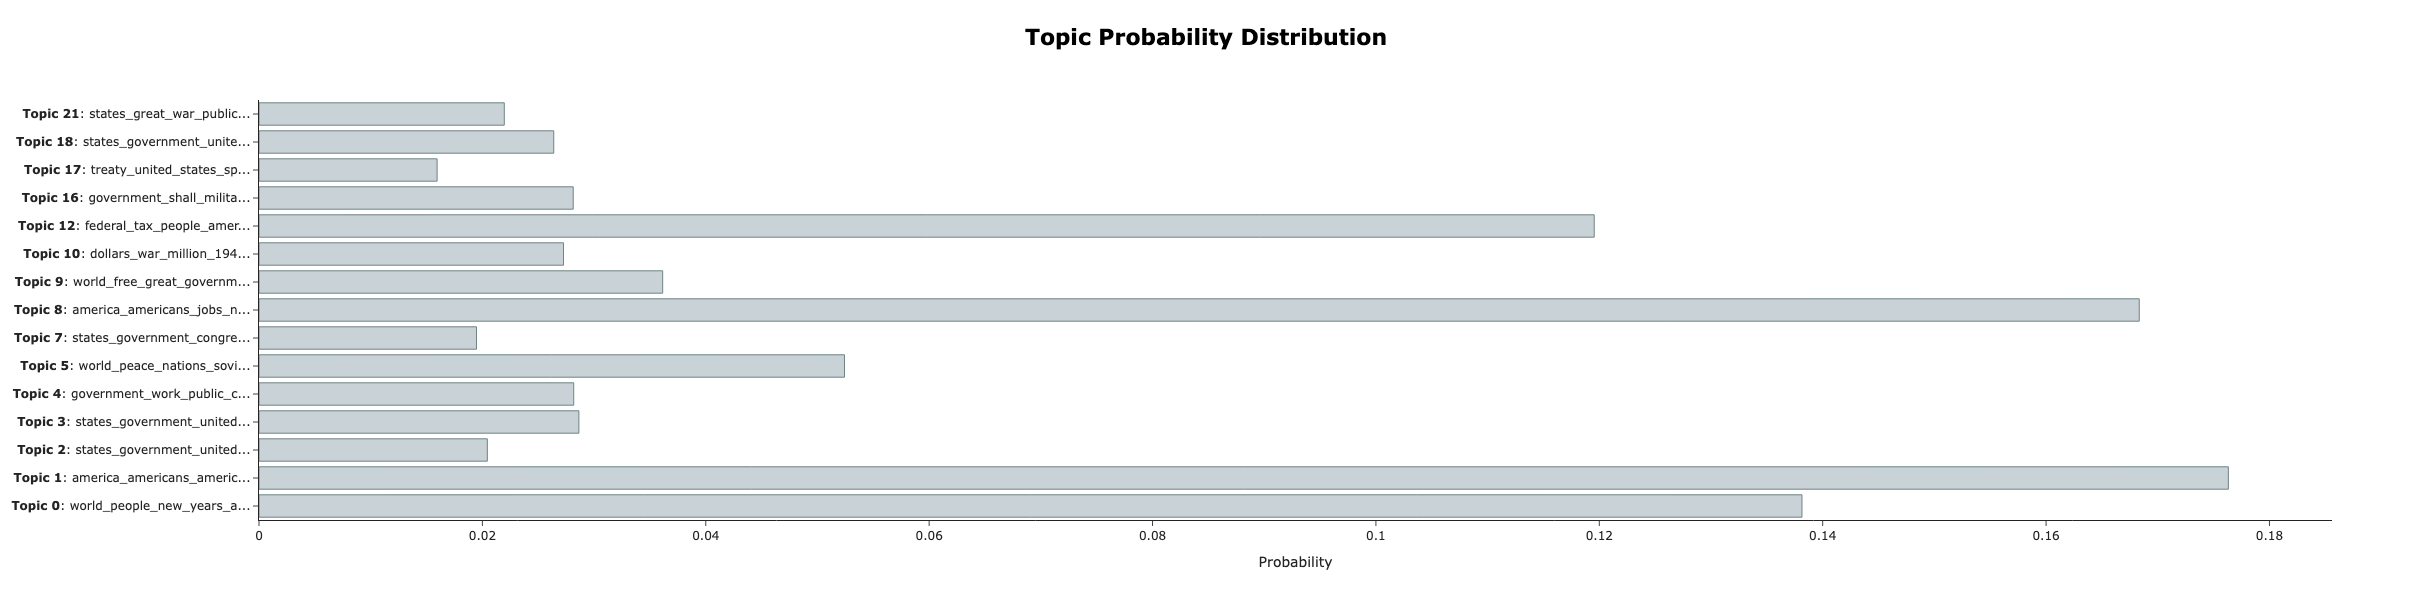

In [88]:
# output the topic distribution for the first speech
# hint: check out approximate_distribution() and visualize_distribution()

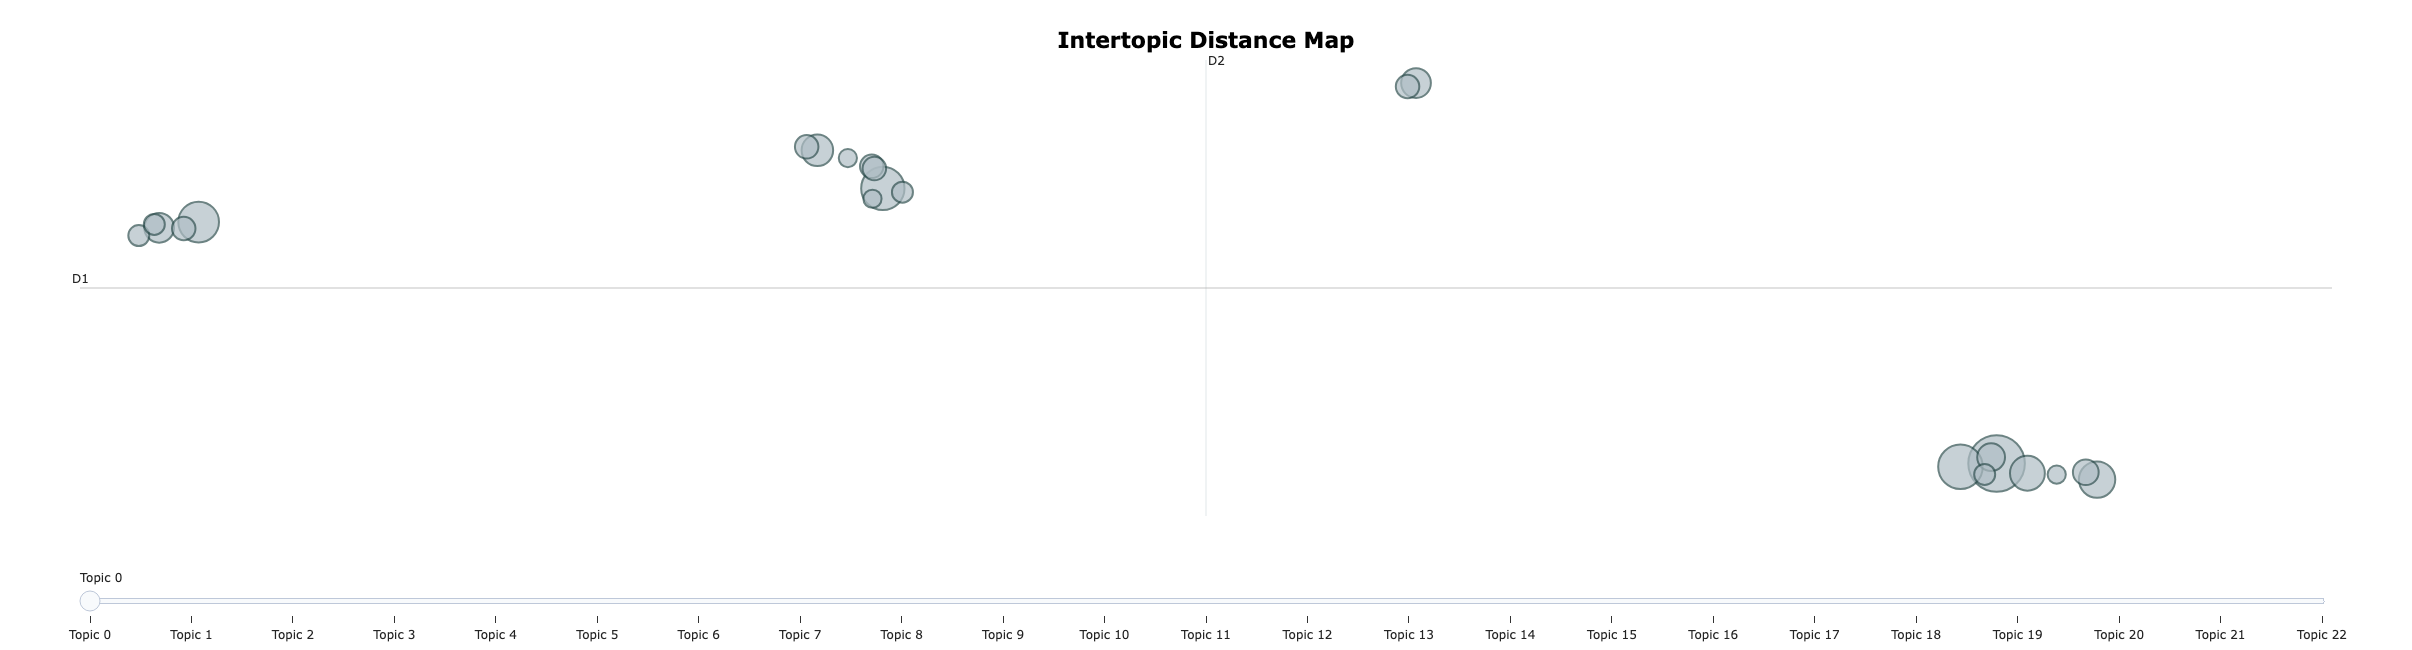

In [90]:
# run this cell to visualize the topics
topic_model.visualize_topics()

## Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

This section is open ended and your chance to explare any advanced analysis. Please perform any additional analysis you find interesting! Suggested analyses (only do one max):

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 
- Word frequency over time - does the frequency of certain words change over time
- Semantic similarity - investigate similarity within and between presidents or time periods. For example, similarity between one presidents speeches, e.g. are all of Biden's speeches similar to each other? How similar are they to Trump's speeches? Are speeches from the 2000s more similar to each other than speeches in the 1800s? Which two presidents have the most similar speeches? See https://spacy.io/usage/linguistic-features#vectors-similarity 
-  Named Entity Recognition - which entity types are most common in speeches? What are the most common words for each entity type - see https://spacy.io/usage/linguistic-features#named-entities 
- Classification - can you build a classifier to detect democratic versus republican state of the union speeches from 1980-2024 - see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py 
